# Preprocesamiento y Análisis Exploratorio

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

path='../2018_01_23_datos_walmart/'
df = pd.read_csv(path +'1_data.csv', index_col=0)

df.index = pd.to_datetime(df.index)



In [3]:
#trasformacion a variables categoricas
df["Item"] = df["Item"].astype('category')
df["Local"] = df["Local"].astype('category')

df.describe()

print df

           Local Item  Unidades    Venta  Inventario
Fecha                                               
2017-01-07    29   98       2.0   5866.0        29.0
2017-01-07    29  172       1.0   3773.0       247.0
2017-01-07    29  240       NaN      NaN         7.0
2017-01-07    29  249       NaN      NaN         8.0
2017-01-07    29  174       NaN      NaN        18.0
2017-01-07    29  311       NaN      NaN        13.0
2017-01-07    29  423       NaN      NaN        10.0
2017-01-07    29  199       NaN      NaN        11.0
2017-01-07    29   66       1.0   6714.0        76.0
2017-01-07    29  117       NaN      NaN         9.0
2017-01-07    29  551       NaN      NaN         6.0
2017-01-07    29  184       NaN      NaN        72.0
2017-01-07    29  438       1.0   3773.0         9.0
2017-01-07    29   90       NaN      NaN         2.0
2017-01-07    29  123       NaN      NaN        18.0
2017-01-07    29  583       NaN      NaN         9.0
2017-01-07    29  508       NaN      NaN      

In [4]:
df.shape

(4792841, 5)

df.head()

# Estadistica Basica sobre todos los Datos

In [5]:
#conteo de valores unicos en local e item
print('Cantidad de tiendas : %s'% len(np.unique(df['Local'])))
print('Cantidad de Item : %s'% len(np.unique(df['Item'])))
#contar todas las filas 
print('Cantidad de valores : %s'% len(df))
#cantidad de elementos por columna
print('\n * Cantidad de elementos: \n %s'%df.count())
#estadistica basica de datos en cada columna
df.describe()

Cantidad de tiendas : 88
Cantidad de Item : 659
Cantidad de valores : 4792841

 * Cantidad de elementos: 
 Local         4792841
Item          4792841
Unidades      1284968
Venta         1284968
Inventario    4756705
dtype: int64


,Unidades,Venta,Inventario
count,1.284968e+06,1.284968e+06,4.756705e+06
mean,4.029795e+00,1.009626e+04,4.439513e+01
std,1.155237e+01,1.457347e+04,1.126780e+02
min,1.000000e+00,-1.702000e+03,1.000000e+00
25%,1.000000e+00,3.353000e+03,7.000000e+00
50%,2.000000e+00,6.706000e+03,1.600000e+01
75%,4.000000e+00,1.170400e+04,3.900000e+01
max,1.475000e+03,1.124888e+06,5.043000e+03


# Consultas a valores nulos sobre todos los Datos


*  Valores Nulos: 
 Local               0
Item                0
Unidades      3507873
Venta         3507873
Inventario      36136
dtype: int64

 Filas donde el local tiene valor nulo nulas: 
 Empty DataFrame
Columns: [Local, Item, Unidades, Venta, Inventario]
Index: []

 Filas con ventas Nulas: 
 Local         3507873
Item          3507873
Unidades            0
Venta               0
Inventario    3506008
dtype: int64

Numero de filas donde Ventas y unidades contienen nulos:
Local         3507873
Item          3507873
Unidades            0
Venta               0
Inventario    3506008
dtype: int64

Numero de filas donde Ventas y unidades contienen nulos:
           Local Item  Unidades  Venta  Inventario
Fecha                                             
2017-01-07    29  240       NaN    NaN         7.0
2017-01-07    29  249       NaN    NaN         8.0
2017-01-07    29  174       NaN    NaN        18.0
2017-01-07    29  311       NaN    NaN        13.0
2017-01-07    29  423       NaN  

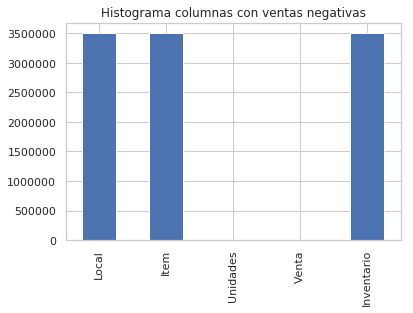

In [6]:
#conteo de valores nulos por cada columna
print("\n*  Valores Nulos: \n %s"%df.isna().sum())


#Filas donde las ventas son nulas
print("\n Filas donde el local tiene valor nulo nulas: \n %s"%df[df['Local'].isna()])

print("\n Filas con ventas Nulas: \n %s"%df[df['Venta'].isna() ].count())


df2 =df[df['Venta'].isna()].count()
df2.plot.bar(title='Histograma columnas con ventas negativas');


print("\nNumero de filas donde Ventas y unidades contienen nulos:\n%s"%df[(df['Unidades'].isna()) & (df['Venta'].isna())].count())
print("\nNumero de filas donde Ventas y unidades contienen nulos:\n%s"%df[(df['Unidades'].isna()) & (df['Venta'].isna())].head())

print("\n Cantidad de filas donde ventas y unidades son nulas: %d"%len(df[(df['Unidades'].isna()) & (df['Venta'].isna())]))




# Consultas a Valores Negativos sobre todos los Datos

In [7]:
#consulta datos escepcionales en ventas
print("\n Todas las ventas negativas: \n %s"%df[df['Venta'] <0 ])
print("\n Filas con ventas negativas: \n %s"%df[df['Venta'] <0 ].count())
#consulta de Unidades negativo
print("\n Filas con Unidades con negativo: \n%s"%df[df['Unidades'] <0 ].count())
# Valores de invetario negativo
print("\n Filas con Inventario con negativo:\n%s"%df[df['Unidades'] <0 ].count())




 Todas las ventas negativas: 
            Local Item  Unidades   Venta  Inventario
Fecha                                              
2017-05-20    23   42       2.0 -1702.0       450.0
2017-05-27    50  297       1.0    -8.0       147.0
2017-07-25    66  463       1.0 -1664.0        10.0
2017-08-27    31   77       1.0  -831.0         NaN
2017-11-05    88  646       3.0  -842.0       100.0
2018-01-11    75   42       1.0  -833.0        59.0

 Filas con ventas negativas: 
 Local         6
Item          6
Unidades      6
Venta         6
Inventario    5
dtype: int64

 Filas con Unidades con negativo: 
Local         0
Item          0
Unidades      0
Venta         0
Inventario    0
dtype: int64

 Filas con Inventario con negativo:
Local         0
Item          0
Unidades      0
Venta         0
Inventario    0
dtype: int64


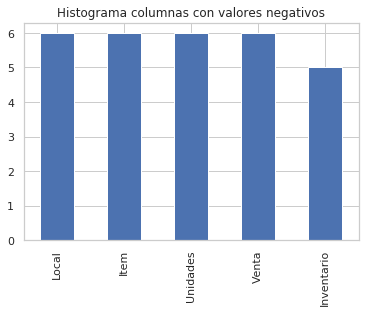

In [8]:
df2 = df[df['Venta'] <0 ].count()
df2.plot.bar(title='Histograma columnas con valores negativos');

# Unidades por tienda, sobre todos los datos

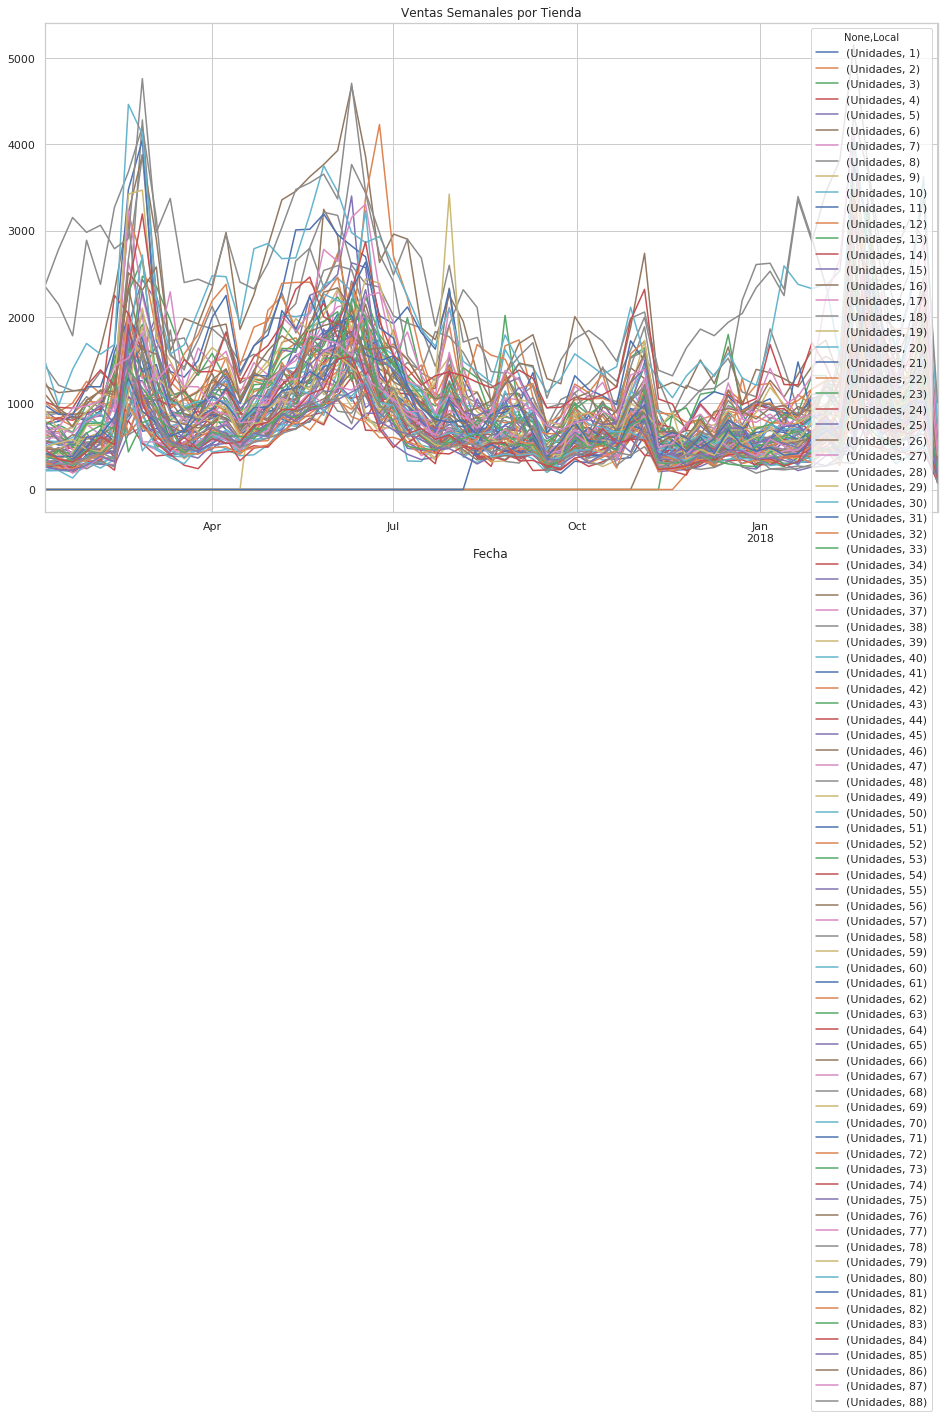

In [9]:
stores = pd.DataFrame(df.groupby(['Fecha','Local']).sum()['Unidades']).unstack()
stores = stores.resample('7D',label='left').sum()
stores.sort_index(inplace = True)
stores.plot(figsize=(16,9), title='Ventas Semanales por Tienda')
plt.show()

# Unidades por producto, sobre todos los datos

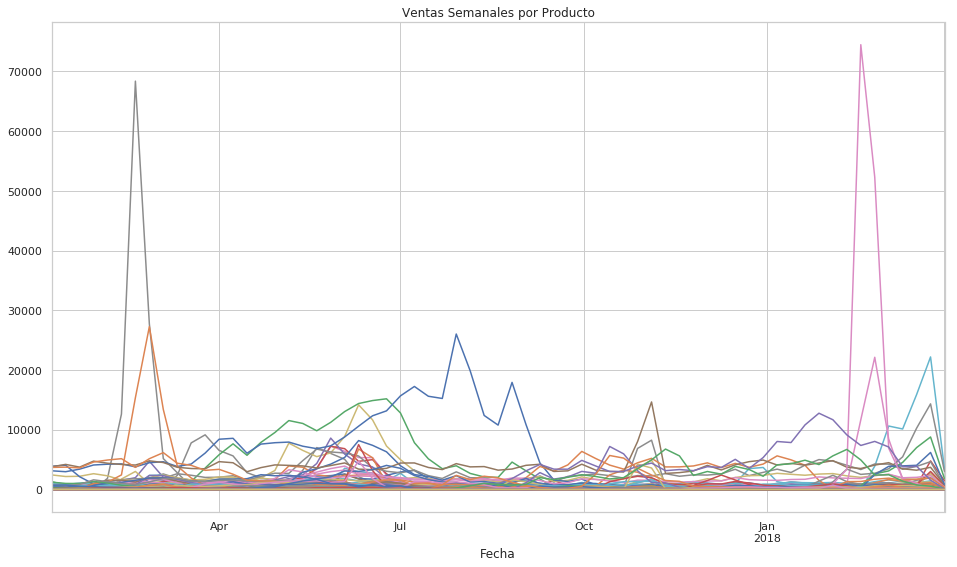

In [10]:
items = pd.DataFrame(df.groupby(['Fecha','Item']).sum()['Unidades']).unstack()
items = items.resample('7D',label='left').sum()
items.sort_index(inplace = True)

items.tail(13)

items.plot(figsize=(16,9), title='Ventas Semanales por Producto', legend=None)
plt.show()

# Estadistica Basica sobre SKU seleccionados

In [11]:
#sacar todos los Item que no sean 3,4,14,66,70,168,173,316,415,475
items=[3,4,14,40,66,70,168,173,316,415,475]
#df = df[df.Item==1]
dff=df[df['Item'].isin(items)]#los que se encuentran en el arreglo
dff.shape

(159577, 5)

In [12]:
#segun documento son 11 productos en 88 tiendas
#conteo de valores unicos en local e item
print('Cantidad de tiendas : %s'% len(np.unique(dff['Local'])))
print('Cantidad de Item : %s'% len(np.unique(dff['Item'])))
#contar todas las filas 
print('Cantidad de valores : %s'% len(dff))
#cantidad de elementos por columna
print('\n * Cantidad de elementos no nulos: \n %s'%dff.count())
#estadistica basica de datos en cada columna
dff.describe(include=['category'])


Cantidad de tiendas : 88
Cantidad de Item : 7
Cantidad de valores : 159577

 * Cantidad de elementos no nulos: 
 Local         159577
Item          159577
Unidades       58233
Venta          58233
Inventario    158848
dtype: int64


,Local,Item
count,159577,159577
unique,88,7
top,4,66
freq,2206,37707


# Consultas a valores nulos sobre SKU Seleccionados (159577)


  Conteo Valores Nulos: 
 Local              0
Item               0
Unidades      101344
Venta         101344
Inventario       729
dtype: int64

 Filas donde el local tiene valor nulo: 
 Empty DataFrame
Columns: [Local, Item, Unidades, Venta, Inventario]
Index: []

 Filas con ventas Nulas: 
 Local         101344
Item          101344
Unidades           0
Venta              0
Inventario    101277
dtype: int64

 Filas con Inventario Nulas: 
 Local         729
Item          729
Unidades      662
Venta         662
Inventario      0
dtype: int64

 Filas con Unidades Nulas: 
 Local         101344
Item          101344
Unidades           0
Venta              0
Inventario    101277
dtype: int64

 Numero de filas donde Ventas y unidades contienen nulos:
Local         101344
Item          101344
Unidades           0
Venta              0
Inventario    101277
dtype: int64

 Ventas y unidades contienen nulos:
           Local Item  Unidades  Venta  Inventario
Fecha                                   

,Unidades,Venta,Inventario
count,1.284968e+06,1.284968e+06,4.756705e+06
mean,4.029795e+00,1.009626e+04,4.439513e+01
std,1.155237e+01,1.457347e+04,1.126780e+02
min,1.000000e+00,-1.702000e+03,1.000000e+00
25%,1.000000e+00,3.353000e+03,7.000000e+00
50%,2.000000e+00,6.706000e+03,1.600000e+01
75%,4.000000e+00,1.170400e+04,3.900000e+01
max,1.475000e+03,1.124888e+06,5.043000e+03


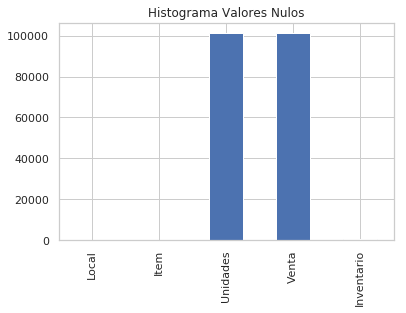

In [13]:

#Filas donde las ventas son nulas
#print dff.isna().sum()

#conteo de valores nulos por cada columna
print("\n  Conteo Valores Nulos: \n %s"%dff.isna().sum())
df2 =dff.isna().sum()
df2.plot.bar(title='Histograma Valores Nulos')

print("\n Filas donde el local tiene valor nulo: \n %s"%dff[dff['Local'].isna()])

print("\n Filas con ventas Nulas: \n %s"%dff[dff['Venta'].isna() ].count())
print("\n Filas con Inventario Nulas: \n %s"%dff[dff['Inventario'].isna() ].count())
print("\n Filas con Unidades Nulas: \n %s"%dff[dff['Unidades'].isna() ].count())


print("\n Numero de filas donde Ventas y unidades contienen nulos:\n%s"%dff[(dff['Unidades'].isna()) & (dff['Venta'].isna())].count())
print("\n Ventas y unidades contienen nulos:\n%s"%dff[(dff['Unidades'].isna()) & (dff['Venta'].isna())].head())
print("\n Cantidad de filas donde ventas y unidades son nulas: %d"%len(dff[(dff['Unidades'].isna()) & (dff['Venta'].isna())]))


print("\n Numero de filas donde Inventario y unidades contienen nulos:\n%s"%dff[(dff['Unidades'].isna()) & (dff['Inventario'].isna())].count())
print("\n Inventario y unidades contienen nulos:\n%s"%dff[(dff['Unidades'].isna()) & (dff['Inventario'].isna())].head())
print("\n Cantidad de filas donde Inventario y unidades son nulas: %d"%len(dff[(dff['Unidades'].isna()) & (dff['Inventario'].isna())]))


#valores unicos de Items
print('Items : \n %s'% dff['Item'].unique())

#comparacion = [item for item in dff['Item'].unique() if not item in dff['Item'].unique()]
#print('Comparacion : \n %s'% comparacion)

df.describe()

In [14]:
df_nan=dff.isna() #sin nulos

df_nan.describe()

,Local,Item,Unidades,Venta,Inventario
count,159577,159577,159577,159577,159577
unique,1,1,2,2,2
top,False,False,True,True,False
freq,159577,159577,101344,101344,158848


In [15]:
print dff.groupby(['Local','Item']).agg({'Unidades': [np.size]})#size equibalente a count

print dff.groupby(['Local','Item']).agg({'Venta': [np.size]})#size equibalente a count

           Unidades
               size
Local Item         
1     14      339.0
      40      276.0
      66      447.0
      70      184.0
      173     435.0
      415      22.0
2     14      449.0
      40      449.0
      66      446.0
      70      305.0
      168       3.0
      173     403.0
      415      29.0
3     14      118.0
      40      142.0
      66      447.0
      70      303.0
      173     356.0
      415      22.0
4     14      449.0
      40      449.0
      66      449.0
      70      384.0
      168       1.0
      173     444.0
      415      30.0
5     14      275.0
      40      193.0
      66      413.0
      70      232.0
...             ...
84    40      146.0
      66      444.0
      70      382.0
      168       3.0
      173     447.0
      415      24.0
85    14      445.0
      40      227.0
      66      449.0
      70      386.0
      173     369.0
      415      22.0
86    14      347.0
      40      449.0
      66      449.0
      70      253.0


# Consultas a Valores Negativos sobre SKU seleccionados

In [16]:
#valores unicos de Item
import numpy as np
print('Items : \n %s'% dff['Item'].unique())



Items : 
 [66, 173, 14, 40, 70, 168, 415]
Categories (7, int64): [66, 173, 14, 40, 70, 168, 415]


In [17]:
df_nan.loc[df_nan.Item==66]

,Local,Item,Unidades,Venta,Inventario
Fecha,,,,,
